In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [4]:
t=pd.read_csv("E:train_jqd04QH.csv")

In [5]:
t.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [7]:
t.shape

(18359, 14)

In [ ]:
# outlier removal code
a = a[~((a < (Q1-1.5 * IQR)) |(a > (Q3 + 1.5 * IQR))).any(axis=1)]
a.shape

In [8]:
t.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
t['city'].dtype

dtype('O')

In [10]:
t['city'] = t['city'].str.replace('city_', '')

In [11]:
t['city']=pd.to_numeric(t['city'],errors='coerce')

In [12]:
t['gender'].value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [13]:
t['experience'] = np.where(t['experience'].str[0]=='>',20,t['experience'])

In [14]:
t['experience'] = np.where(t['experience'].str[0]=='<',0,t['experience'])

In [15]:
t['experience']=pd.to_numeric(t['experience'],errors='coerce')

In [16]:
t['last_new_job'] = np.where(t['last_new_job'].str[0]=='>',5,t['last_new_job'])

In [17]:
t['last_new_job'] = np.where(t['last_new_job']=='never',0,t['last_new_job'])

In [18]:
t['last_new_job']=pd.to_numeric(t['last_new_job'],errors='coerce')

In [19]:


cat_col = t.select_dtypes(['object']).columns

In [20]:
cat_col

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [21]:
t.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
last_new_job              float64
training_hours              int64
target                      int64
dtype: object

In [22]:
t.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [23]:
X = t.drop(['target','enrollee_id'], axis=1)

### Simple Imputer

In [84]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [85]:
imp.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [86]:
t.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [87]:
X = pd.DataFrame(data=imp.transform(X), 
                             columns=['city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'])

In [88]:
X.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69
2,16,0.91,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4
3,64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26
4,100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2,88


In [24]:
X.isnull().sum()

city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
dtype: int64

In [118]:
a = t['target']
a = pd.DataFrame(a)

t = pd.concat([X,a],axis = 1)

In [119]:
a

,target
0,0
1,0
2,0
3,0
4,1
...,...
18354,0
18355,0
18356,0
18357,0


In [120]:
t.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,16,0.91,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2,88,1


### Normal method

In [176]:
t['company_size'].value_counts()

50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [177]:
t['experience'].fillna(t['experience'].mode()[0], inplace=True)

In [178]:
t['enrolled_university'].fillna(t['enrolled_university'].mode()[0], inplace=True)

In [179]:
t['education_level'].fillna(t['education_level'].mode()[0], inplace=True)

In [180]:
t['last_new_job'].fillna(t['last_new_job'].mode()[0], inplace=True)

In [181]:
t['gender'].fillna(t['gender'].mode()[0], inplace=True)

In [182]:
t['gender'].value_counts()

Male      16982
Female     1188
Other       189
Name: gender, dtype: int64

In [183]:
t['major_discipline'].fillna(t['major_discipline'].mode()[0], inplace=True)

In [184]:
t['company_size'].fillna(t['company_size'].mode()[0], inplace=True)

In [185]:
t['company_type'].fillna(t['company_type'].mode()[0], inplace=True)

### categorical data to numerical conversion

In [125]:
cat_col = t.select_dtypes(['object']).columns
cat_col

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [126]:
for col in cat_col:
    freq = t[col].value_counts()
    k = freq.index[freq>20][:-1]
    for cat in k:
        name=col+'_'+cat
        t[name]= (t[col]==cat).astype(int)
    del t[col]
    print(col)

TypeError: can only concatenate str (not "int") to str

In [124]:
t.shape

(18359, 13)

### Train test split

In [55]:
#X = t.drop(['target','enrollee_id'], axis=1)
y = t['target']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 3477  3488  3504 ... 18356 18357 18358] Test: [   0    1    2 ... 3695 3696 3697]
Train: [    0     1     2 ... 18356 18357 18358] Test: [3477 3488 3504 ... 7350 7351 7352]
Train: [    0     1     2 ... 18356 18357 18358] Test: [ 7286  7297  7315 ... 11021 11022 11024]
Train: [    0     1     2 ... 18356 18357 18358] Test: [10957 10970 10979 ... 14691 14692 14693]
Train: [    0     1     2 ... 14691 14692 14693] Test: [14647 14648 14674 ... 18356 18357 18358]


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
original_Xtrain = scaler.fit_transform(original_Xtrain)
original_Xtest = scaler.fit_transform(original_Xtest)

ValueError: could not convert string to float: 'city_149'

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [194]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [195]:
print("Before OverSampling, counts of label '1': {}".format(sum(original_ytrain == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(original_ytrain == 0))) 
  
    
print("After OverSampling, counts of label '1': {}".format(sum(ysm_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(ysm_train == 0))) 

Before OverSampling, counts of label '1': 1940
Before OverSampling, counts of label '0': 12748 

After OverSampling, counts of label '1': 12748
After OverSampling, counts of label '0': 12748


In [196]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2',solver = 'sag',random_state = 42,C=0.2) 
logreg.fit(Xsm_train, ysm_train) 
predictions = logreg.predict(original_Xtest) 
  
# print classification report 
print(classification_report(original_ytest, predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      3186
           1       0.20      0.58      0.29       485

    accuracy                           0.63      3671
   macro avg       0.55      0.61      0.52      3671
weighted avg       0.82      0.63      0.69      3671



In [197]:
import sklearn

In [198]:
sklearn.metrics.accuracy_score(original_ytest,predictions)

0.6306183601198584

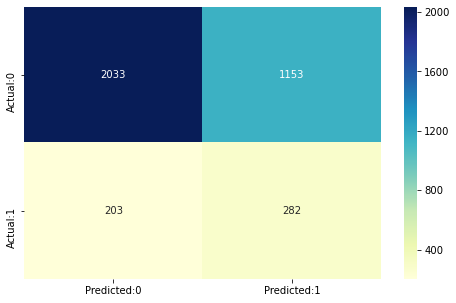

In [199]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original_ytest,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [200]:

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [201]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6306183601198584 

 The Miss-classification = 1-Accuracy =  0.3693816398801416 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.5814432989690722 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.6381042059008161 

 Positive Predictive value = TP / (TP+FP) =  0.19651567944250872 

 Negative predictive Value = TN / (TN+FN) =  0.9092128801431127 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  1.6066594540463695 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.6559378502137413


In [202]:
y_pred_prob = logreg.predict_proba(original_Xtest)[:, 1]

In [203]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(original_Xtest)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(original_ytest,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[   0 3186]
 [   0  485]] 
 with 485 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[  17 3169]
 [   0  485]] 
 with 502 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0053358443188951665 



With 0.3 threshold the Confusion Matrix is  
 [[ 184 3002]
 [  12  473]] 
 with 657 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.9752577319587629 Specificity:  0.05775266792215945 



With 0.4 threshold the Confusion Matrix is  
 [[ 941 2245]
 [  70  415]] 
 with 1356 correct predictions and 70 Type II errors( False Negatives) 

 Sensitivity:  0.8556701030927835 Specificity:  0.2953546767106089 





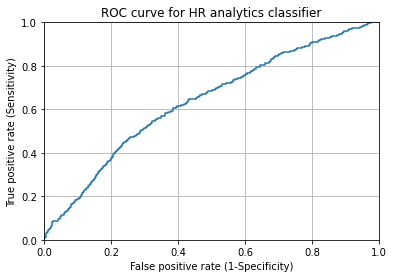

In [204]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(original_ytest, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for HR analytics classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [205]:
sklearn.metrics.roc_auc_score(original_ytest, y_pred_prob_yes[:,1])

0.6372894299156749

### Boosting

In [206]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [207]:
LR_boost=AdaBoostClassifier(base_estimator=logreg,n_estimators=200,random_state = 100,learning_rate=0.5)

In [208]:
LR_boost.fit(Xsm_train, ysm_train) 
predictions = LR_boost.predict(original_Xtest) 

In [209]:
sklearn.metrics.accuracy_score(original_ytest,predictions)

0.6322527921547262

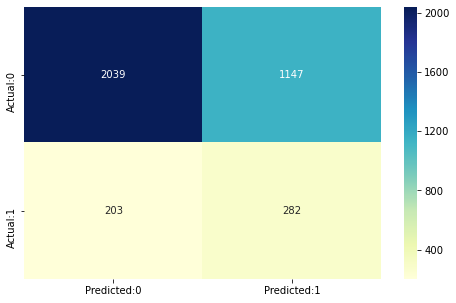

In [210]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original_ytest,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [211]:
y_pred_prob = LR_boost.predict_proba(original_Xtest)[:, 1]

In [212]:

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [213]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.6322527921547262 

 The Miss-classification = 1-Accuracy =  0.3677472078452738 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.5814432989690722 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.6399874450721909 

 Positive Predictive value = TP / (TP+FP) =  0.1973407977606718 

 Negative predictive Value = TN / (TN+FN) =  0.9094558429973238 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  1.6150639498827064 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.6540076750782422


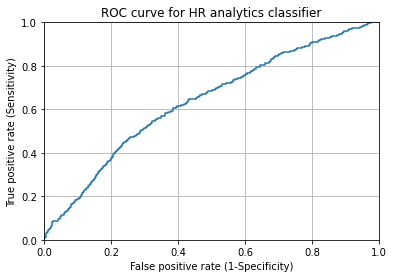

In [214]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(original_ytest, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for HR analytics classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [215]:
sklearn.metrics.roc_auc_score(original_ytest, y_pred_prob_yes[:,1])

0.6372894299156749

### Building model using train data

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
original_Xtrain = scaler.fit_transform(X)

In [217]:
te=pd.read_csv("E:test_KaymcHn.csv")

In [218]:
te.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [219]:
te['city'] = te['city'].str.replace('city_', '')

In [220]:
te['city']=pd.to_numeric(te['city'],errors='coerce')

In [221]:
te['experience'] = np.where(te['experience'].str[0]=='>',20,te['experience'])

In [222]:
te['experience'] = np.where(te['experience'].str[0]=='<',0,te['experience'])

In [223]:
te['experience']=pd.to_numeric(te['experience'],errors='coerce')

In [224]:
te['last_new_job'] = np.where(te['last_new_job'].str[0]=='>',5,te['last_new_job'])

In [225]:
te['last_new_job'] = np.where(te['last_new_job']=='never',0,te['last_new_job'])

In [226]:
te['last_new_job']=pd.to_numeric(te['last_new_job'],errors='coerce')

In [227]:

cat_col = te.select_dtypes(['object']).columns

In [228]:
cat_col

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [239]:
te.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [230]:
te['experience'].fillna(te['experience'].mode()[0], inplace=True)

In [231]:
te['enrolled_university'].fillna(te['enrolled_university'].mode()[0], inplace=True)

In [232]:
te['education_level'].fillna(te['education_level'].mode()[0], inplace=True)

In [233]:
te['last_new_job'].fillna(te['last_new_job'].mode()[0], inplace=True)

In [234]:
te['gender'].fillna(te['gender'].mode()[0], inplace=True)

In [235]:
te['major_discipline'].fillna(te['major_discipline'].mode()[0], inplace=True)

In [236]:
te['company_size'].fillna(te['company_size'].mode()[0], inplace=True)

In [237]:
te['company_type'].fillna(te['company_type'].mode()[0], inplace=True)

In [238]:
cat_col = te.select_dtypes(['object']).columns
cat_col

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [240]:
for col in cat_col:
    freq = te[col].value_counts()
    k = freq.index[freq>20][:-1]
    for cat in k:
        name=col+'_'+cat
        te[name]= (te[col]==cat).astype(int)
    del te[col]
    print(col)

gender
relevent_experience
enrolled_university
education_level
major_discipline
company_size
company_type


In [241]:
te.shape

(15021, 32)

In [242]:
Xtest = te.drop(['enrollee_id'], axis=1)
Xtest.shape

(15021, 31)

In [243]:
original_Xtest = scaler.fit_transform(Xtest)

In [244]:
original_Xtest.shape

(15021, 31)

In [246]:
target = LR_boost.predict(original_Xtest) 
target

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [249]:
te['target'] = target

In [250]:
te.head()

,enrollee_id,city,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Female,relevent_experience_Has relevent experience,enrolled_university_no_enrollment,...,company_size_10/49,company_size_1000-4999,company_size_<10,company_size_500-999,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Public Sector,company_type_Early Stage Startup,company_type_NGO,target
0,16548,33,0.448,0.0,1.0,15,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,12036,28,0.939,20.0,1.0,94,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,11061,103,0.920,3.0,1.0,17,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5032,104,0.924,20.0,2.0,76,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,17599,77,0.830,6.0,2.0,65,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0


In [251]:
df = pd.DataFrame(te, columns = ['enrollee_id', 'target']) 

In [252]:
df.to_csv("E:/myhackathon2.csv",index=False)